In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import BasicAer
from qiskit.aqua.algorithms import AmplitudeEstimation
from qiskit.aqua.components.uncertainty_models import LogNormalDistribution
from qiskit.aqua.components.uncertainty_problems import UnivariateProblem
from qiskit.aqua.components.uncertainty_problems import UnivariatePiecewiseLinearObjective as PwlObjective

import random
# number of qubits to represent the uncertainty
num_uncertainty_qubits = 3

In [6]:
# add input from price, calculated volatility, and loop 365 times
def run_uncertainty_model(atom_input, price_input, vol_input, intrest_input, day_input):

    
    # parameters for considered random distribution
    S = price_input # initial spot price
    vol = vol_input # volatility of 1%
    r = intrest_input # annual interest rate of 2%
    T = day_input / 365 # 40 days to maturity


    # resulting parameters for log-normal distribution
    mu = ((r - 0.5 * vol**2) * T + np.log(S))
    sigma = vol * np.sqrt(T)
    mean = np.exp(mu + sigma**2/2)
    variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    stddev = np.sqrt(variance)

    #print("mu ", mu)
    #print("sigma ", sigma)
    #print("mean ", mean)
    #print("variance ", variance)
    #print("stddv ", stddev)


    # lowest and highest value considered for the spot price; in between, an equidistant discretization is considered.
    low  = np.maximum(0, mean - 3*stddev)
    high = mean + 3*stddev

    #print("low ", low)

    #print("high ", high)

    # construct circuit factory for uncertainty model
    uncertainty_model = LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma, low=low, high=high)
    atom_input.clear()
    atom_input.append(uncertainty_model)
    #print(uncertainty_model.probabilities)
    
    return atom_input

In [16]:
def loop_me():
    x_sorted = []
    y_sorted = []
    weights_prob = []
    
    best_values = []
    best_prob = []
    
    def vol_formula():
        today_price = [20]
        yesterday_price = [30]
        formula = today_price - yesterday_price/yesterday_price*100
        print(formula)
        
        
    for i in range(1,365):
        atom_state = [0]
        #api call to stock 
        price = 20
        vol = 0.4
        intrest = 0.02    
        # run_uncertainty_model(atom_input, price_input, vol_input, intrest_input, day_input):
        run_uncertainty_model(atom_state, price, vol, intrest, i)
        uncertainty_model = atom_state[0]
        x = uncertainty_model.values
        y = uncertainty_model.probabilities
        
        #y.index(max(y))
        #print(max(y))
        for array_i in range(7):
            x_sorted.append(x[array_i])
            y_sorted.append(y[array_i])
        best_values.append(max(x_sorted))
        best_prob.append(max(y_sorted))
        print("====================================================")
        print("day # ", i)
        print("====================================================")
        
        
        print(best_values)
        print(best_prob)
        
    
    
    value_average = sum(best_values)/len(best_values)
    prob_average = sum(best_prob)/len(best_values)
    
    
    
loop_me()
    
        
        

day #  1
[20.898541590230653]
[0.316081624389944]
day #  2
[20.898541590230653, 21.271580403336547]
[0.316081624389944, 0.31777973271866455]
day #  3
[20.898541590230653, 21.271580403336547, 21.55822061508294]
[0.316081624389944, 0.31777973271866455, 0.31909834231573136]
day #  4
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057]
[0.316081624389944, 0.31777973271866455, 0.31909834231573136, 0.32022065725873633]
day #  5
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022]
[0.316081624389944, 0.31777973271866455, 0.31909834231573136, 0.32022065725873633, 0.3212176199011588]
day #  6
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746]
[0.316081624389944, 0.31777973271866455, 0.31909834231573136, 0.32022065725873633, 0.3212176199011588, 0.32212560407197266]
day #  7
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01

day #  60
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.517974

day #  117
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.51797

day #  171
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.51797

day #  222
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.51797

day #  274
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.51797

day #  322
[20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057, 22.01354985988022, 22.20666824605746, 22.384434265506165, 22.55005189485155, 22.705746255507485, 22.853137177787126, 22.99344730179343, 23.127626341565033, 23.256429431274753, 23.38046873083173, 23.500248665524424, 23.616190728590922, 23.728651393028105, 23.83793533723026, 23.944305401035695, 24.04799020890419, 24.14919009541058, 24.24808177344333, 24.34482205653999, 24.439550859537885, 24.532393641508357, 24.623463412656598, 24.712862396687413, 24.800683418275263, 24.887011069231676, 24.97192269503622, 25.055489234431718, 25.137775937975604, 25.218842986213094, 25.298746024094378, 25.3775366250995, 25.455262696049886, 25.531968831614265, 25.607696625943984, 25.682484947607428, 25.75637018297161, 25.82938645234575, 25.901565802521993, 25.972938378788427, 26.04353257902697, 26.11337519212495, 26.182491522608238, 26.250905503135797, 26.31863979627029, 26.385715886747263, 26.45215416530553, 26.51797

In [20]:
def plot_uncertainty():
    atom_state = [0]
    run_uncertainty_model(atom_state)
uncertainty_model = atom_state[0]
    
    print(uncertainty_model)
    # plot probability distribution
    x = uncertainty_model.values
    y = uncertainty_model.probabilities

    print(x)
    print(y)

    plt.bar(x, y, width=0.2)
    plt.xticks(x, size=15, rotation=90)
    plt.yticks(size=15)
    plt.grid()
    plt.xlabel('Spot Price at Maturity $S_T$ (\$)', size=15)
    plt.ylabel('Probability ($\%$)', size=15)
    plt.show()

plot_uncertainty()

IndentationError: unexpected indent (<ipython-input-20-037113d161a6>, line 6)

In [30]:
# https://stackoverflow.com/questions/14992521/python-weighted-random
import random
my_list = ['A'] * 5 + ['B'] * 5 + ['C'] * 90
random.choice(my_list)

'A'

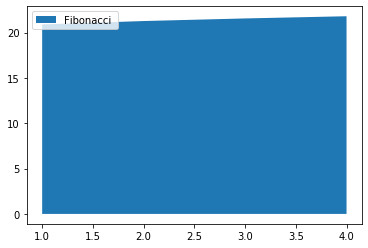

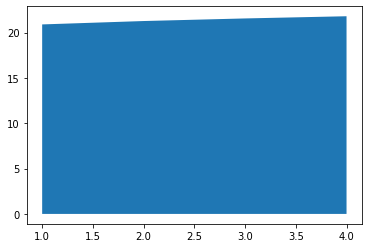

None


In [4]:


import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y1 = [20.898541590230653, 21.271580403336547, 21.55822061508294, 21.800160859679057]

y = np.vstack([y1])

labels = ["Fibonacci "]

fig, ax = plt.subplots()
ax.stackplot(x, y1, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
print (plt.show())


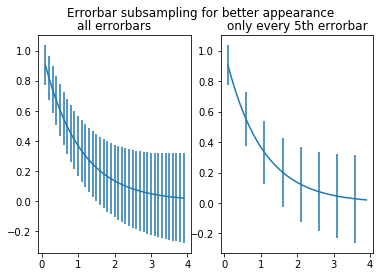

None


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.1)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.1 * np.sqrt(x)


# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.errorbar(x, y, yerr=yerr)
ax.set_title('all errorbars')

ax = axs[1]
ax.errorbar(x, y, yerr=yerr, errorevery=5)
ax.set_title('only every 5th errorbar')


fig.suptitle('Errorbar subsampling for better appearance')

print(plt.show())